In [24]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ogcore.output_plots as op
import ogcore.output_tables as ot
import ogcore.parameter_plots as pp
from ogcore.utils import safe_read_pickle

# set plot style
plt.style.use("ogcore.OGcorePlots")
# set current directory
sim_dir = "/Users/richardevans/Docs/Economics/OSE/OG/OG-PHL/examples/OG-PHL-Example"

In [11]:
# read in output from health ins simulation
base_params = safe_read_pickle(
    os.path.join(
        sim_dir, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_ss = safe_read_pickle(
    os.path.join(
        sim_dir, "OUTPUT_BASELINE", "SS", "SS_vars.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_dir, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
reform_params = safe_read_pickle(
    os.path.join(
        sim_dir, "OUTPUT_REFORM", "model_params.pkl"
    )
)
reform_tpi = safe_read_pickle(
    os.path.join(
        sim_dir, "OUTPUT_REFORM", "TPI", "TPI_vars.pkl"
    )
)


## Ability profiles

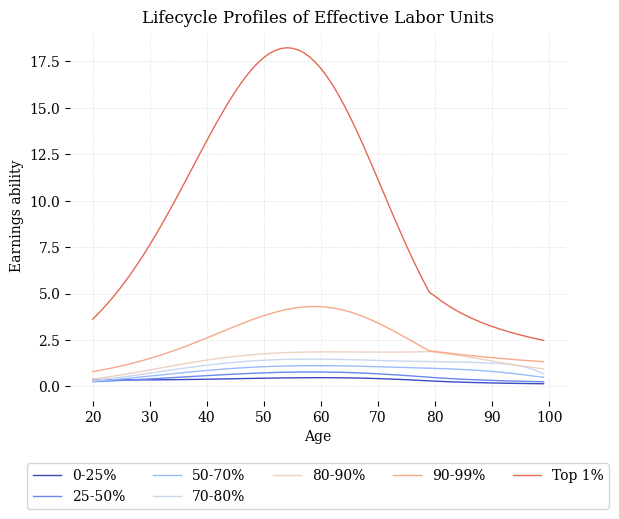

In [26]:
fig = pp.plot_ability_profiles(
    base_params, log_scale=False, include_title="Lifetime Ability Profiles"
)

# Macro effects

/var/folders/d4/trj3dssd6s3g8kxvjmczz11w0000gn/T/ipykernel_63743/171525482.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


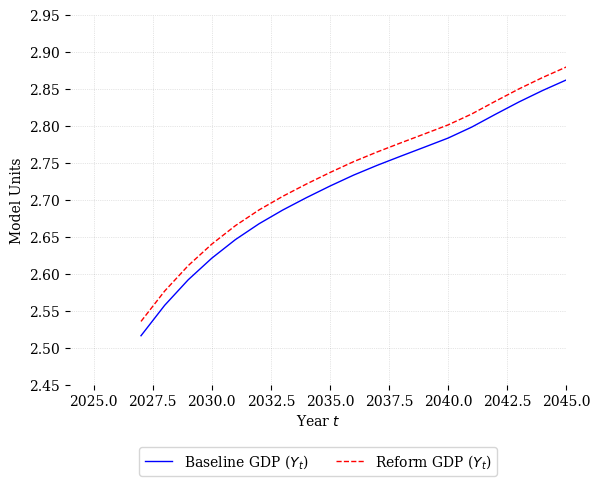

In [10]:
# use a op function to plot pct diff in GDP
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="levels",
    num_years_to_plot=20,
    start_year=base_params.start_year +2
    )
fig.show()

## 3D steady-state plot

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/ogphl-dev/lib/python3.11/site-packages/matplotlib/pyplot.py'>

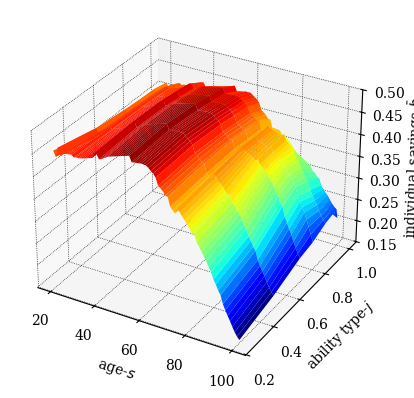

In [12]:
op.ss_3Dplot(
    base_params,
    base_ss,
    var="nssmat",
    plot_type="levels",
)

In [20]:
ans = ot.macro_table(
    base_tpi,
    base_params,
    var_list=["Y", "C", "K", "L", "r", "w"],
    output_type="pct_diff",
    stationarized=True,
    num_years=10,
    include_SS=True,
    include_overall=True,
    start_year=2025,
)

AssertionError: 

# Fiscal Impacts

/var/folders/d4/trj3dssd6s3g8kxvjmczz11w0000gn/T/ipykernel_63743/2622836806.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


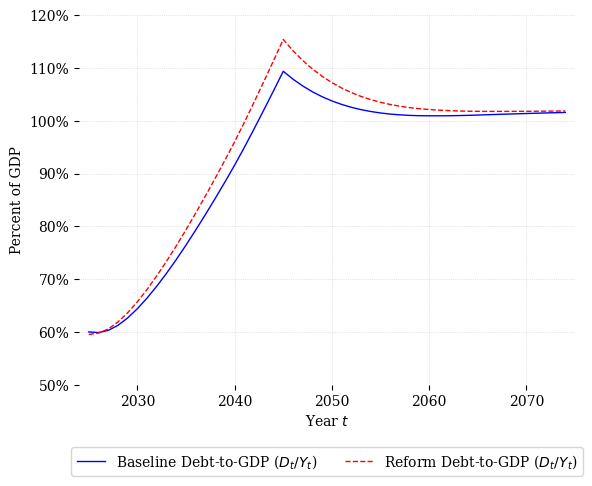

In [13]:
# debt to GDP
fig = op.plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=base_params.start_year,
)
fig.show()

/var/folders/d4/trj3dssd6s3g8kxvjmczz11w0000gn/T/ipykernel_63743/2475368714.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


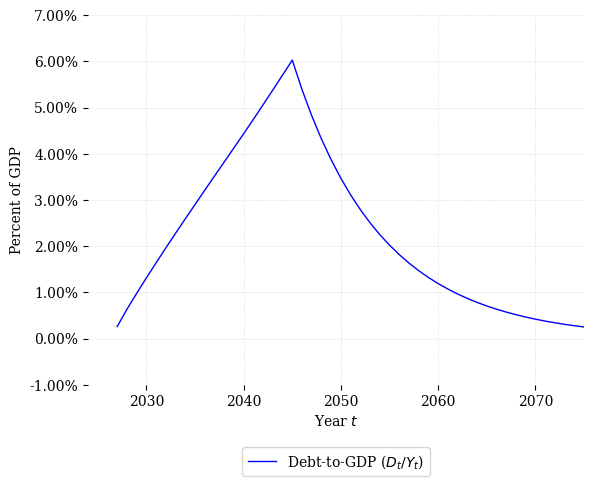

In [15]:
# tax revenue to GDP
fig = op.plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["D"],
    plot_type="pct_diff",
    num_years_to_plot=50,
    start_year=base_params.start_year+ 2,
)
fig.show()

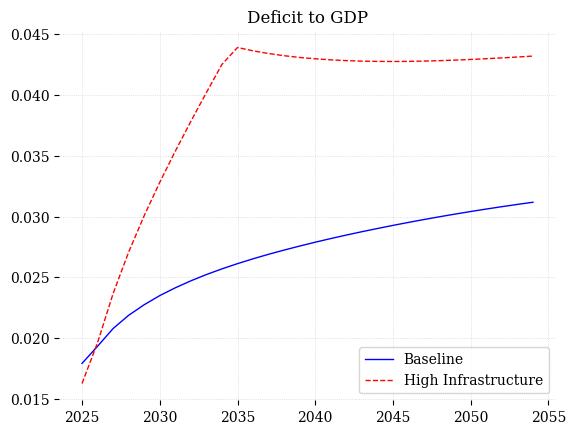

In [7]:
# Deficit to GDP
base_spend = base_tpi["TR"] + base_tpi["agg_pension_outlays"] + base_tpi["r_gov"] * base_tpi["D"] + base_tpi["G"]
deficits_base = (base_spend - base_tpi["total_tax_revenue"]) / base_tpi["Y"]
reform_spend = reform_tpi["TR"] + reform_tpi["agg_pension_outlays"] + reform_tpi["r_gov"] * reform_tpi["D"] + reform_tpi["G"]
deficits_reform = (reform_spend - reform_tpi["total_tax_revenue"]) / reform_tpi["Y"]

fig = plt.figure()
plt.plot(np.arange(base_params.start_year, base_params.start_year + 30), deficits_base[:30], label="Baseline")
plt.plot(np.arange(base_params.start_year, base_params.start_year + 30), deficits_reform[:30], label="High Infrastructure")
plt.title("Deficit to GDP")
plt.legend()

# Elasticity of GDP with respect to government infrastructure investment

In [8]:
# Compute the pct change in infrastructure spending over 30 years
num_years = 30
pct_change_Ig = (reform_tpi["I_g"][:num_years].sum() - base_tpi["I_g"][:num_years].sum()) / base_tpi["I_g"][:num_years].sum()
pct_change_Y = (reform_tpi["Y"][:num_years].sum() - base_tpi["Y"][:num_years].sum()) / base_tpi["Y"][:num_years].sum()
print("The elasticity of GDP wrt infrastructure spending is: ", pct_change_Y / pct_change_Ig)

The elasticity of GDP wrt infrastructure spending is:  0.042452955004014796


In [13]:
# Compute the return on infrastructure spending over 30 years
num_years = 30
change_Ig = (reform_tpi["I_g"][:num_years].sum() - base_tpi["I_g"][:num_years].sum())
change_Y = (reform_tpi["Y"][:num_years].sum() - base_tpi["Y"][:num_years].sum())
print("The gross return infrastructure spending is: ", change_Y / change_Ig)

The gross return infrastructure spending is:  3.2656119233857543


0.06215108911994268